In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
# plot style
mpl.rcParams['font.family'] = 'Segoe UI'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.titlepad'] = 4
mpl.rcParams['axes.titleweight'] = 400

# dark mode
mpl.rcParams['figure.facecolor'] = '#1e1e1e'
mpl.rcParams['axes.facecolor'] = '#1e1e1e'
mpl.rcParams['axes.edgecolor'] = 'grey'
mpl.rcParams['axes.labelcolor'] = 'white'
mpl.rcParams['axes.titlecolor'] = 'white'
mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'
mpl.rcParams['text.color'] = 'white'

# dpi and figsize
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
%matplotlib inline

FROM_API = False
TRAIN_MODEL = False

# Wczytanie danych

In [33]:
from load_data import *
if FROM_API:
    api_to_csv(filename="books.csv")
data = csv_to_df(filename="books.csv")

In [34]:
data.head(3)

,title,rating,ratings_count,release_year,pages,users_count,reviews_count,editions_count,lists_count,journals_count,ratings,Genre,Mood,Pace,Tag,Content Warning,Member
id,,,,,,,,,,,,,,,,,
15,Cybele's Secret,4.071429,14,2007,448,25,2,5,14,25,"{2.0: 1, 3.0: 3, 4.0: 4, 5.0: 6}","[Fantasy, Young Adult, Adventure, Fiction, His...",[],[],[],[],[]
42,Notes from Underground,4.084416,154,1847,149,557,18,121,177,539,"{1.0: 1, 2.0: 5, 2.5: 1, 3.0: 22, 3.5: 5, 4.0:...","[Classics, Classics, Realistic Fiction, Philos...","[challenging, emotional, mysterious, dark, ref...","[slow, medium, medium, slow]","[Character driven, Strong Character Developmen...",[],[]
59,Holding Up the Universe,3.5,43,2016,402,106,7,8,42,107,"{1.0: 1, 1.5: 1, 2.0: 7, 3.0: 13, 4.0: 10, 5.0...","[Romance, Young Adult, Fiction, General, Young...",[],[],[],[],[]


# Analiza danych

In [35]:
data.describe()

,rating,ratings_count,release_year,pages,users_count,reviews_count,editions_count,lists_count,journals_count
count,11556.0,11556.0,11250.0,10548.0,11556.0,11556.0,11556.0,11556.0,11556.0
mean,3.859417,68.093544,1979.492889,350.095184,157.282797,9.136985,15.458723,66.701108,152.018432
std,0.350366,140.542394,215.936164,202.222575,269.577892,15.683339,50.203009,102.022699,266.271093
min,2.2,11.0,-1800.0,0.0,12.0,0.0,0.0,0.0,0.0
25%,3.636364,16.0,2000.0,239.0,41.0,2.0,3.0,20.0,38.0
50%,3.875,28.0,2013.0,336.0,75.0,4.0,6.0,36.0,74.0
75%,4.09375,61.0,2019.0,423.0,160.0,10.0,11.0,71.0,157.0
max,5.0,3118.0,2024.0,6680.0,4738.0,222.0,1223.0,1807.0,4535.0


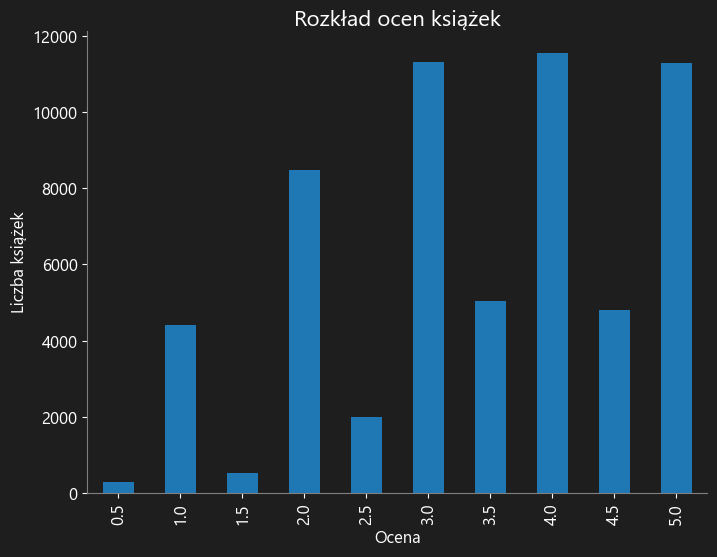

In [36]:
# Rozkład ocen książek
ratings = data['ratings'].apply(lambda x: x.keys()).explode()
ratings.value_counts().sort_index().plot(kind='bar')
plt.title('Rozkład ocen książek')
plt.xlabel('Ocena')
plt.ylabel('Liczba książek')
plt.show()

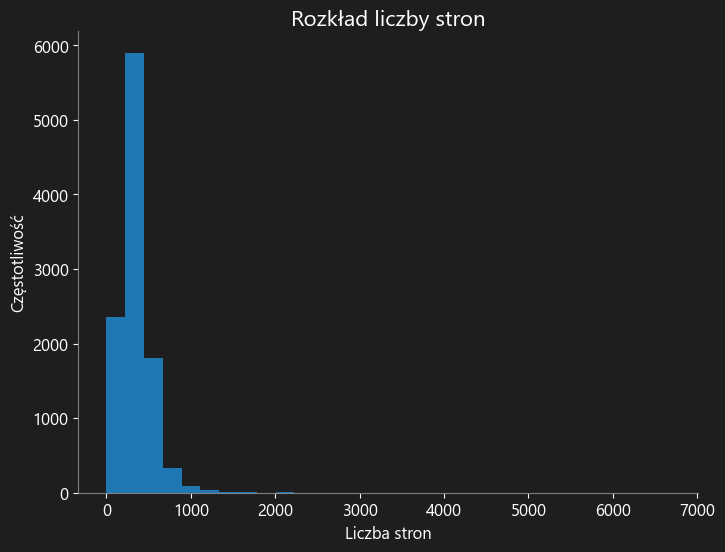

In [37]:
# Rozkład liczby stron
data['pages'].plot(kind='hist', bins=30)
plt.title('Rozkład liczby stron')
plt.xlabel('Liczba stron')
plt.ylabel('Częstotliwość')
plt.show()

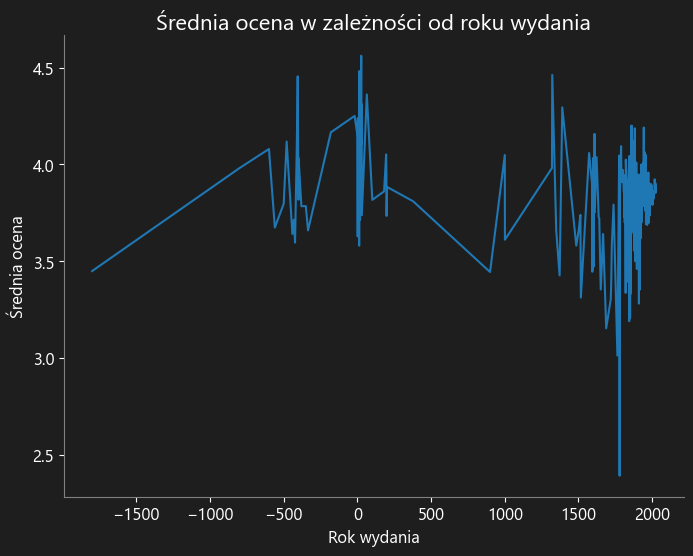

In [38]:
# Średnia ocena w zależności od roku wydania
avg_rating_by_year = data.groupby('release_year')['rating'].mean()
avg_rating_by_year.plot(kind='line')
plt.title('Średnia ocena w zależności od roku wydania')
plt.xlabel('Rok wydania')
plt.ylabel('Średnia ocena')
plt.show()

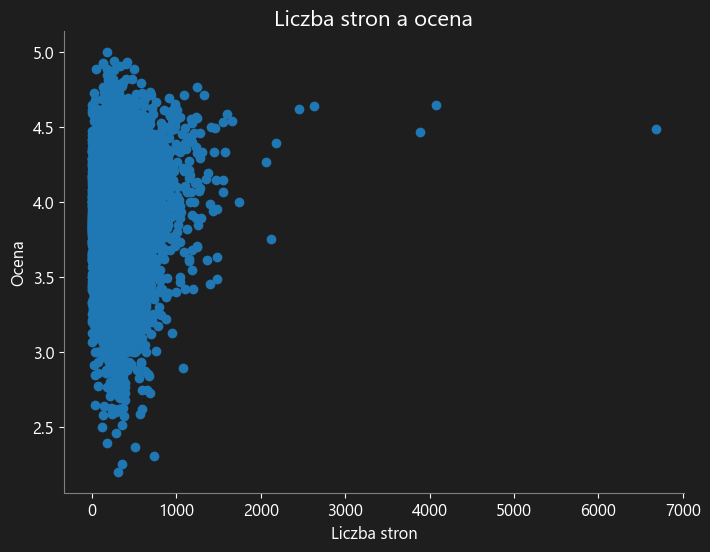

In [39]:
# Liczba stron a ocena
df = data.dropna(subset=['pages', 'rating'])
plt.scatter(df['pages'], df['rating'])
plt.title('Liczba stron a ocena')
plt.xlabel('Liczba stron')
plt.ylabel('Ocena')
plt.show()

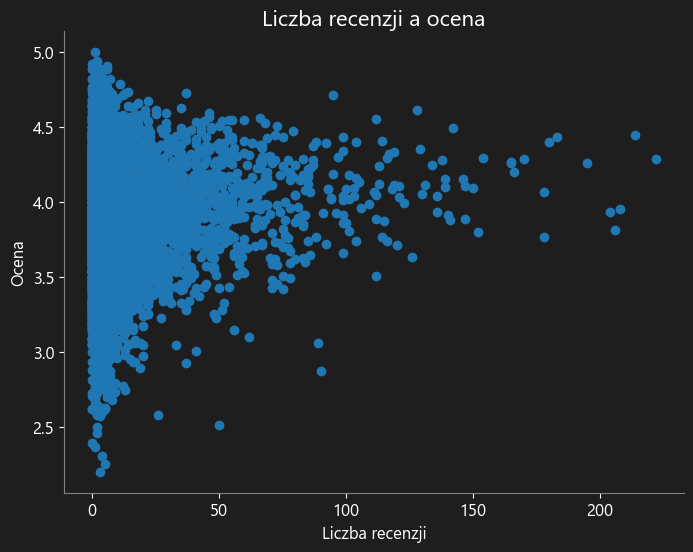

In [40]:
# Liczba recenzji a ocena
plt.scatter(data['reviews_count'], data['rating'])
plt.title('Liczba recenzji a ocena')
plt.xlabel('Liczba recenzji')
plt.ylabel('Ocena')
plt.show()

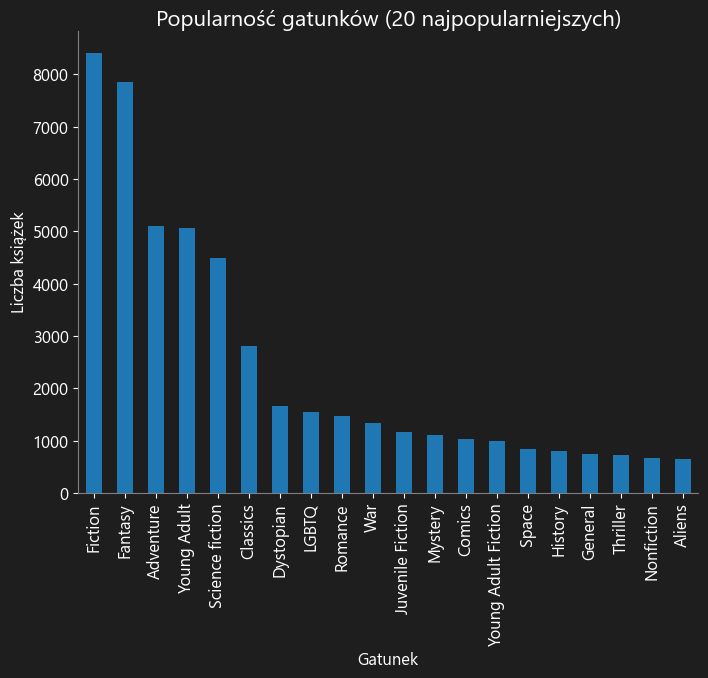

In [41]:
# Popularność gatunków (20 najpopularniejszych)
genres = data['Genre'].explode()
top_genres = genres.value_counts().nlargest(20)
top_genres.plot(kind='bar')
plt.title('Popularność gatunków (20 najpopularniejszych)')
plt.xlabel('Gatunek')
plt.ylabel('Liczba książek')
plt.show()

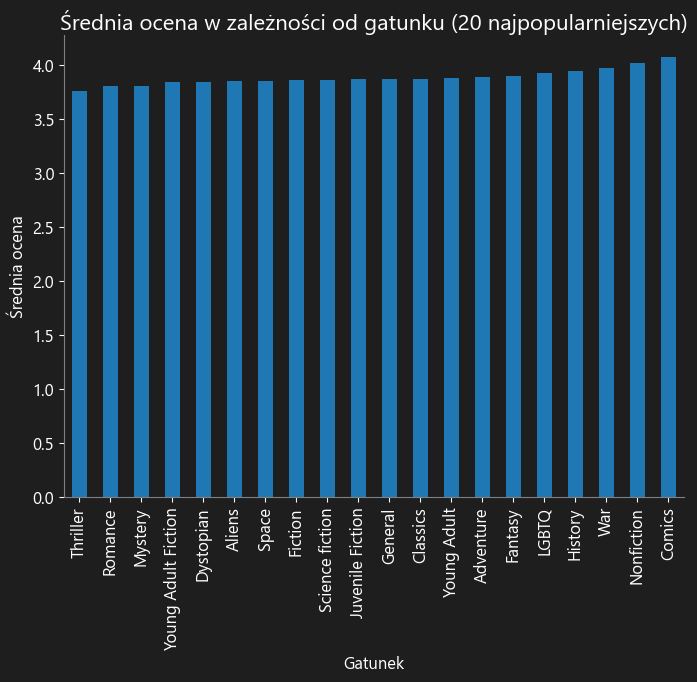

In [42]:
# Średnia ocena w zależności od gatunku (20 najpopularniejszych)
genres = data['Genre'].explode()
genre_ratings = data.explode('Genre').groupby('Genre')['rating'].mean()
genre_ratings[top_genres.index].sort_values().plot(kind='bar')
plt.title('Średnia ocena w zależności od gatunku (20 najpopularniejszych)')
plt.xlabel('Gatunek')
plt.ylabel('Średnia ocena')
plt.show()

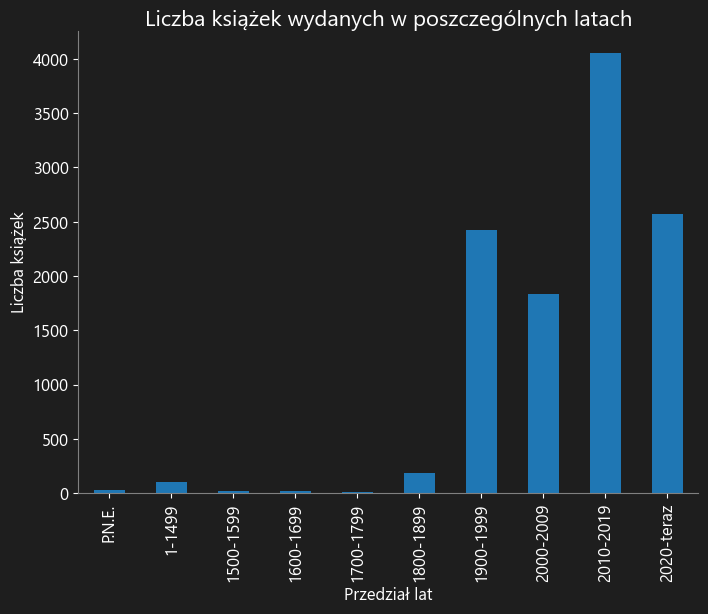

In [43]:
# Liczba książek wydanych w poszczególnych latach
bins = [-1000, 1, 1500, 1600, 1700, 1800, 1900, 2000, 2010, 2020, 3000]
labels = ['P.N.E.', '1-1499', '1500-1599', '1600-1699', '1700-1799', '1800-1899', '1900-1999', '2000-2009', '2010-2019', '2020-teraz']
data['year_bins'] = pd.cut(data['release_year'], bins=bins, labels=labels, right=False)
books_per_year_bin = data['year_bins'].value_counts().sort_index()
books_per_year_bin.plot(kind='bar')
plt.title('Liczba książek wydanych w poszczególnych latach')
plt.xlabel('Przedział lat')
plt.ylabel('Liczba książek')
plt.show()

# Predykcja oceny

Dopasujemy modele predykcji, gdzie za zmienne objaśniane przyjmiemy średnią i wariancję ocen, a za zmienne objaśniające:
1. `release_year` (numeric) - rok wydania książki,
2. `pages` (numeric) - liczba stron,
3. `editions_count` (numeric) - liczba wydań,
4. `lists_count` (numeric) - liczba pojawień się książki w listach użytkowników,
5. `journals_count` (numeric) - liczba pojawień się książki w czasopismach,
6. `reviews_count` (numeric) - liczba pojawień się książki w recenzjach,
7. `Genre` (factor) - gatunek ,
8. `Mood` (factor) - nastrój książki,
9. `Content Warning` (factor) - ostrzeżenia o drażliwych treściach,
10. `Tag` (factor) - tagi (pozostałe istotne cechy książki).

Każda ze zmiennych jakościowych kodowana jest jako lista napisów, aby książka mogła należeć jednocześnie do kilku kategorii.

# Przygotowanie danych

W przypadku zmiennych typu factor, z uwagi na bardzo dużą liczbę możliwych wartości, ograniczamy się do najpopularniejszych:
1. 50 gatunków,
2. 15 nastrojów,
3. 5 ostrzeżeń,
4. 5 tagów.

Pozostałe kategorie kodujemy jako inne (np. `Genre_inne`).

Średnia ocen dla każdej książki zawiera się w ramce danych w kolumnie `rating`. Wariancję wyznaczamy korzystając ze wzoru na wariancję próbkową i zapisujemy w kolumnie `rating_var`.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.metrics import mean_squared_error

df = data[['rating', 'ratings', 'ratings_count', 'release_year',
           'pages', 'editions_count', 'lists_count',
           'journals_count', 'reviews_count', 'Genre',
           'Mood', 'Content Warning', 'Tag']].dropna()

print(f"liczba wierszy: {df.shape[0]}")

# Z powodu wielu rzadko występujących wartości, bierzemy 50, 15, 5 i 5
# najczęstszych gatunków, nastrojów, ostrzeżeń o treści i tagów odpowiednio
top_values = {
    'Genre': df['Genre'].explode().value_counts().nlargest(50).index,
    'Mood': df['Mood'].explode().value_counts().nlargest(15).index,
    'Content Warning': df['Content Warning'].explode().value_counts().nlargest(5).index,
    'Tag': df['Tag'].explode().value_counts().nlargest(5).index
}
for column, top in top_values.items():
    df[column] = df[column].apply(lambda x: [i if i in top else column+'_inne' for i in x])

mlb = MultiLabelBinarizer()
for column in top_values.keys():
    df = df.join(pd.DataFrame(mlb.fit_transform(df[column]), columns=mlb.classes_, index=df.index))
df = df.drop(columns=['Genre', 'Mood', 'Content Warning', 'Tag'])

# Obliczamy wariancję ocen
df['rating_var'] = df.apply(
    lambda x: sum(
        count * (rating - x.rating) ** 2 
        for rating, count in x.ratings.items()
    ) / (x.ratings_count - 1), axis=1)
df = df.drop(columns=["ratings", "ratings_count"])

# Normalizacja zmiennych numerycznych
scaler = StandardScaler()
numeric_cols = ['release_year', 'pages', 'editions_count', 'lists_count', 'journals_count', 'reviews_count']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Podział na zbiór treningowy i testowy
X = df.drop(columns=['rating', 'rating_var'], axis=1).astype("float32").to_numpy()
y = df[['rating', 'rating_var']].astype("float32").to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=314)

liczba wierszy: 10532


In [45]:
df.describe()

,rating,release_year,pages,editions_count,lists_count,journals_count,reviews_count,Adventure,Adventure stories,Aliens,...,Violence,death,murder,A mix driven,Diverse Characters,Loveable Characters,Not Diverse Characters,Strong Character Development,Tag_inne,rating_var
count,10532.0,1.053200e+04,1.053200e+04,1.053200e+04,1.053200e+04,1.053200e+04,1.053200e+04,10532.000000,10532.000000,10532.000000,...,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000
mean,3.862304,2.482717e-16,8.365676e-17,-1.619163e-17,-6.476652e-17,-1.079442e-17,2.698605e-17,0.423756,0.012628,0.053266,...,0.050418,0.058678,0.039689,0.321876,0.312191,0.363369,0.323205,0.376757,0.483954,0.808289
std,0.350519,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,0.494176,0.111669,0.224575,...,0.218816,0.235033,0.195236,0.467218,0.463409,0.480993,0.467723,0.484596,0.499766,0.315824
min,2.2,-1.738078e+01,-1.731867e+00,-3.069306e-01,-6.511219e-01,-5.678215e-01,-5.812626e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.636364,9.319176e-02,-5.498460e-01,-2.491117e-01,-4.580674e-01,-4.277911e-01,-4.550648e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.590312
50%,3.878788,1.529869e-01,-7.011363e-02,-1.912929e-01,-3.036237e-01,-2.951308e-01,-3.288669e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.764681
75%,4.097015,1.851843e-01,3.601618e-01,-9.492820e-02,4.387445e-02,1.441010e-02,4.972665e-02,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.977785
max,5.0,2.081824e-01,3.130537e+01,2.326388e+01,1.679136e+01,1.614370e+01,1.342670e+01,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.204545


# Model regresji liniowej

Aby łatwo interpretować wpływ cech na rozkład ocen, wykorzystamy model regresji liniowej. Dla każdej z cech jakościowych sumujemy współczynniki wszystkich kategorii, aby estymować całkowity wpływ danej cechy. Wpływ poszczególnych kategorii na rozkład ocen zbadamy dokładniej w dalszej części.

In [46]:
from sklearn.linear_model import LinearRegression

# Model regresji liniowej dla ocen
model_rating = LinearRegression()
model_rating.fit(X_train, y_train[:, 0])

# Model regresji liniowej dla wariancji ocen
model_rating_var = LinearRegression()
model_rating_var.fit(X_train, y_train[:, 1])

coef_rating = pd.Series(model_rating.coef_, index=df.drop(columns=['rating', 'rating_var']).columns)
coef_rating_var = pd.Series(model_rating_var.coef_, index=df.drop(columns=['rating', 'rating_var']).columns)

# Sumowanie współczynników regresji dla cech jakościowych 
def sum_coefficients(coef, top_values, numeric_cols):
    coef_sum = {}
    for column in top_values.keys():
        coef_sum[column] = coef.filter(like=column).sum()
    for column in numeric_cols:
        coef_sum[column] = coef[column]
    return pd.Series(coef_sum)

numeric_cols = ['release_year', 'pages', 'editions_count', 'lists_count', 'journals_count', 'reviews_count']
coef_sum_rating = sum_coefficients(coef_rating, top_values, numeric_cols).sort_values(ascending=False)
coef_sum_rating_var = sum_coefficients(coef_rating_var, top_values, numeric_cols).sort_values(ascending=False)

print("Wpływ cech na ocenę:")
print(coef_sum_rating)

print("\nWpływ cech na wariancję ocen:")
print(coef_sum_rating_var)

Wpływ cech na ocenę:
pages              0.037360
lists_count        0.030745
Genre              0.024461
journals_count     0.010867
release_year      -0.000339
Mood              -0.002160
Content Warning   -0.004903
reviews_count     -0.017879
editions_count    -0.021592
Tag               -0.031212
dtype: float32

Wpływ cech na wariancję ocen:
journals_count     0.029075
reviews_count      0.027678
Tag                0.023247
pages              0.012487
editions_count     0.008641
Content Warning    0.007945
release_year       0.002262
Mood               0.000593
Genre             -0.005438
lists_count       -0.050350
dtype: float32


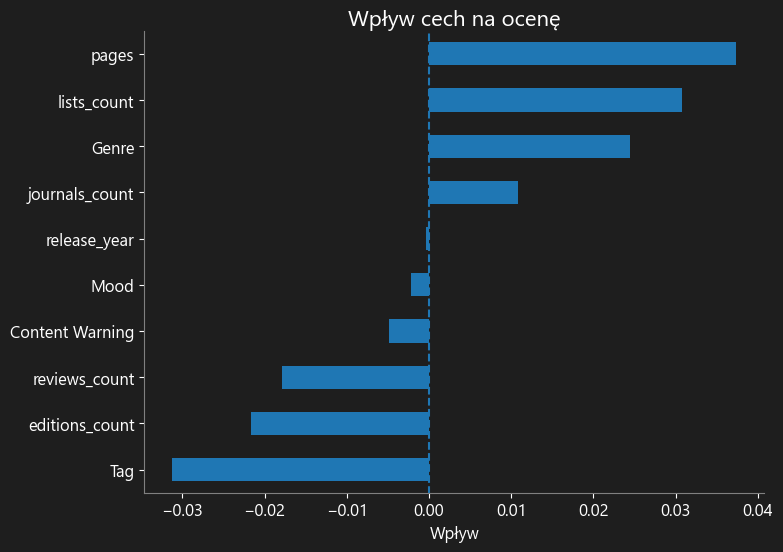

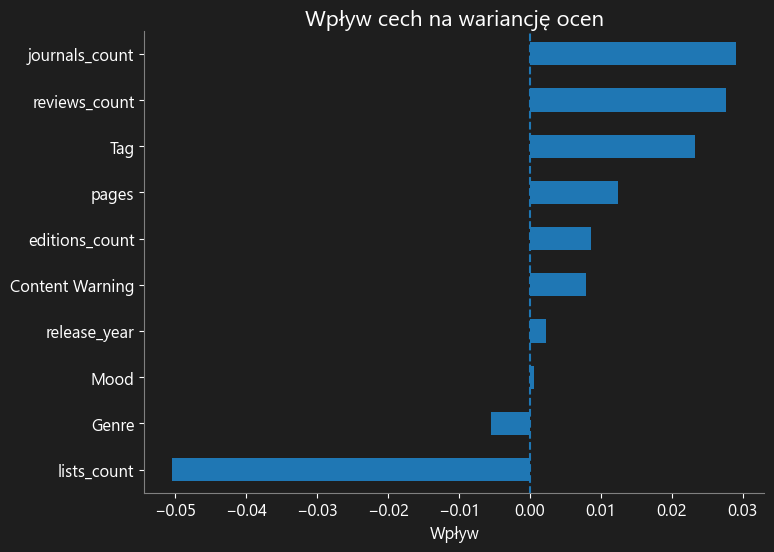

In [47]:
coef_sum_rating[::-1].plot(kind='barh')
plt.vlines(0, -1, len(coef_sum_rating), linestyles='dashed')
plt.title('Wpływ cech na ocenę')
plt.xlabel('Wpływ')
plt.show()

coef_sum_rating_var[::-1].plot(kind='barh')
plt.vlines(0, -1, len(coef_sum_rating_var), linestyles='dashed')
plt.title('Wpływ cech na wariancję ocen')
plt.xlabel('Wpływ')
plt.show()

* Pojawianie się książki w wielu czaopismach zwiększa ocenę i zróżnicowanie opinii.

* Pojawianie się książki w wielu listach użytkowników zwiększa ocenę i zdecydowanie zmniejsza zróżnicowanie opinii.

* Długość książki ma znaczący wpływ na ocenę - Dłuższe książki generują zazwyczaj lepsze oceny i bardziej zróżnicowane opinie.

In [48]:
print('Wpływ każdego gatunku na ocenę:')
genre_coef = coef_rating.filter(items=(top_values['Genre'].to_list()+['Genre_inne']), axis=0)
genre_coef.index = genre_coef.index.str.replace('Genre_inne', 'Inny')
print(genre_coef.sort_values(ascending=False))

Wpływ każdego gatunku na ocenę:
Manga                            0.215238
Comics                           0.170868
Comics & Graphic Novels          0.153197
Science                          0.114196
Biography & Autobiography        0.097384
Urban Fantasy                    0.081102
Short stories                    0.077583
War                              0.073886
Murder                           0.058387
Biography                        0.047349
Nonfiction                       0.045105
Humor                            0.036562
Children                         0.036115
Historical Fiction               0.034914
Adventure                        0.032962
LGBTQ                            0.031437
Juvenile Nonfiction              0.028875
History                          0.028454
Magic                            0.027439
Inny                             0.024461
Fantasy                          0.024362
Juvenile Fiction                 0.019400
Fantasy fiction                  0.017695
Cl

* Manga, komiksy i literatura edukacyjna są wyraźnymi liderami w generowaniu wysokich ocen.

* Literatura popularna (np. romance, thrillery, science fiction) często otrzymuje bardziej krytyczne oceny.

* Gatunki niszowe (np. philosophy, aliens) lub bardziej specyficzne (np. adventure stories) mają zróżnicowane wyniki, co może wskazywać na węższe grono odbiorców o różnorodnych oczekiwaniach.

In [49]:
print('Wpływ każdego nastroju na ocenę:')
mood_coef = coef_rating.filter(items=(top_values['Mood'].to_list()+['Mood_inne']), axis=0)
mood_coef.index = mood_coef.index.str.replace('Mood_inne', 'Inny')
print(mood_coef.sort_values(ascending=False))

Wpływ każdego nastroju na ocenę:
inspiring       0.075579
sad             0.056357
informative     0.052361
hopeful         0.042583
Adventurous     0.039730
funny           0.035416
suspenseful     0.031544
reflective      0.022638
emotional       0.016353
challenging     0.014559
relaxing        0.004326
tense          -0.001387
Inny           -0.002160
dark           -0.007193
lighthearted   -0.041335
mysterious     -0.047939
dtype: float32


* Emocjonalny wpływ jest kluczowy: Inspirujące, emocjonalne i nadzieję budzące książki cieszą się największym uznaniem.

In [50]:
print('Wpływ każdego ostrzeżenia o treści na ocenę:')
content_warning_coef = coef_rating.filter(items=(top_values['Content Warning'].to_list()+['Content Warning_inne']), axis=0)
content_warning_coef.index = content_warning_coef.index.str.replace('Content Warning_inne', 'Inne')
print(content_warning_coef.sort_values(ascending=False))

Wpływ każdego ostrzeżenia o treści na ocenę:
Rape               0.025748
death              0.020650
Violence           0.016010
Inne              -0.004903
murder            -0.015864
Death of parent   -0.042375
dtype: float32


* Ciężkie treści (np. ostrzeżenia o gwałcie) mogą zwiększać ocenę, o ile są dobrze przedstawione.

In [51]:
print('Wpływ każdego tagu na ocenę:')
tag_coef = coef_rating.filter(items=(top_values['Tag'].to_list()+['Tag_inne']), axis=0)
tag_coef.index = tag_coef.index.str.replace('Tag_inne', 'Inny')
print(tag_coef.sort_values(ascending=False))

Wpływ każdego tagu na ocenę:
Loveable Characters             0.073824
Strong Character Development    0.021831
A mix driven                   -0.005012
Diverse Characters             -0.013755
Inny                           -0.031212
Not Diverse Characters         -0.079644
dtype: float32


* Sympatia i rozwój bohaterów są kluczowymi czynnikami podnoszącymi ocenę, podczas gdy brak różnorodności postaci lub lekkie nastroje obniżają oceny.

# Predykcja z użyciem regresji liniowej

In [52]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('MSE for rating:', mean_squared_error(y_test[:,0], y_pred[:,0]))
print('MSE for variance:', mean_squared_error(y_test[:,1], y_pred[:,1]))

MSE: 0.10112487
MSE for rating: 0.11228236
MSE for variance: 0.08996743


## Predykcja z użyciem modelu Gradient Boosting

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

model = MultiOutputRegressor(GradientBoostingRegressor())
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('MSE for rating:', mean_squared_error(y_test[:,0], y_pred[:,0]))
print('MSE for variance:', mean_squared_error(y_test[:,1], y_pred[:,1]))

MSE: 0.09965186983075885
MSE for rating: 0.10916438121304828
MSE for variance: 0.0901393584484692


Model Gradient Boosting pozwala na estymację istotności każdej z cech. Zbadamy więc, które z nich mają największy wpływ na ocenę.

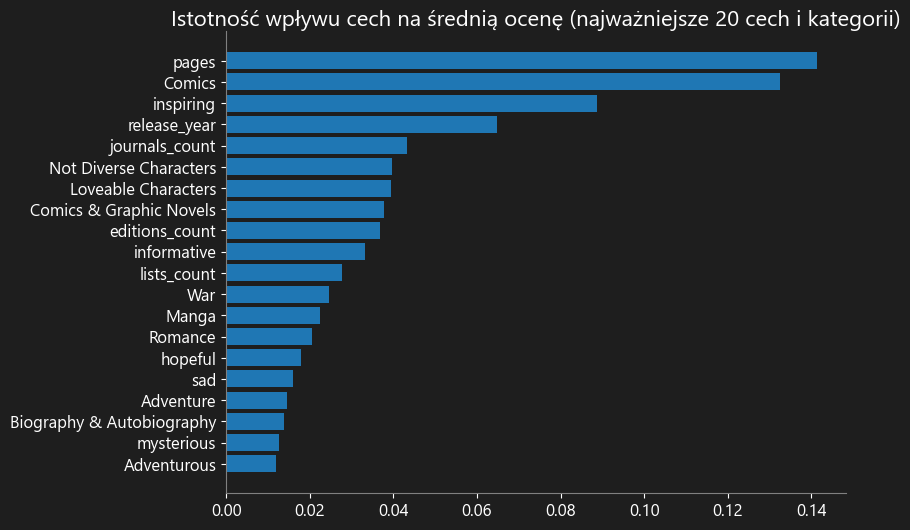

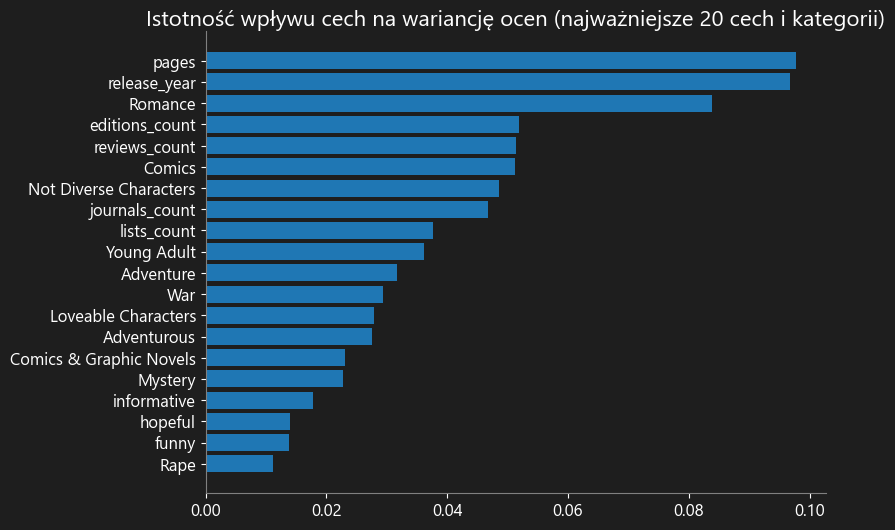

In [54]:
columns = df.drop(columns=['rating', 'rating_var'], axis=1).columns
importances_mean = model.estimators_[0].feature_importances_
importances_var = model.estimators_[1].feature_importances_
sort_mean = np.argsort(importances_mean)
sort_var = np.argsort(importances_var)

c_mean, imp_mean = [columns[i] for i in sort_mean], [importances_mean[i] for i in sort_mean]
c_var, imp_var = [columns[i] for i in sort_var], [importances_var[i] for i in sort_var]
plt.barh(c_mean[65:], width=imp_mean[65:])
plt.title("Istotność wpływu cech na średnią ocenę (najważniejsze 20 cech i kategorii)")
plt.show()
plt.barh(c_var[65:], width=imp_var[65:])
plt.title("Istotność wpływu cech na wariancję ocen (najważniejsze 20 cech i kategorii)")
plt.show()

## Predykcja z użyciem sieci neuronowej

In [55]:
from keras.layers import Dense, Dropout, BatchNormalization
from keras import Input
import keras

if not os.path.exists('model.keras'):
    TRAIN_MODEL = True

if TRAIN_MODEL:
    keras.utils.set_random_seed(314)
    model = keras.Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(192, activation='relu'),
        BatchNormalization(),
        Dropout(0.25),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.25),
        Dense(2, activation='linear')
    ])

    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    model.summary()

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=100,
        batch_size=128,
        verbose=1,
    )
    model.save('model.keras')
else:
    model = keras.models.load_model('model.keras')
y_pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('MSE for rating:', mean_squared_error(y_test[:,0], y_pred[:,0]))
print('MSE for variance:', mean_squared_error(y_test[:,1], y_pred[:,1]))

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MSE: 0.12540998
MSE for rating: 0.154935
MSE for variance: 0.09588487


Predykcje z użyciem sieci neuronowej obarczone są największym błędem oraz brakiem możliwości interpretacji, więc nie będziemy ich dalej analizować. Najlepsze zdolności predykcyjne otrzymujemy wykorzystując model gradient boosting, chociaż regresja liniowa również daje zadowalające wyniki, przy prostszej interpretacji. Zarówno model regresji liniowej, jak i gradient boosting sugerują, że najważniejszą cechą wpływającą na ocenę jest liczba stron książki.